___
# Exercício: Duas variáveis quantitativas com Discriminação Salarial
___

## Aula 04

<div id="indice"></div>

## Índice

- [Discriminação Salarial](#discriminacao-salarial)
    - [Exercício 1](#ex1) **- APS2 disponível no Blackboard**
    - [Exercício 2](#ex2) 
    - [Exercício 3](#ex3) **- APS2 disponível no Blackboard**
    - [Exercício 4](#ex4) **- APS2 disponível no Blackboard**
    - [Exercício 5](#ex5) **- APS2 disponível no Blackboard**
    - [Exercício 6](#ex6) **- APS2 disponível no Blackboard**
    - [Exercício 7](#ex7)
    - [Exercício 8](#ex8)
    - [Exercício 9 [EXTRA]](#ex9)
    - [Exercício 10 [EXTRA]](#ex10)
    - [Exercício 11 [EXTRA]](#ex11)

<div id="discriminacao-salarial"></div>

## <font color='blue'>Discriminação Salarial</font>

Uma empresa está sendo **acusada de pagar um salário maior para os homens do que para as mulheres**. 
Para justificar a acusação, apresentou-se uma lista de salários de uma amostra de funcionários. 
**Essa empresa tem motivos para se preocupar?**

A base de dados `Discriminação.xlsx` apresenta, para cada funcionário, as variáveis:

1. Sexo (`'fem'` ou `'masc'`);
2. Anos (anos no emprego); e 
3. Salario (salário mensal, em milhares de reais). 
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/antonioamaralegydiomartins/Desktop/Antonio amaral/GitHub - Pessoal/CD21-2/aula04


In [3]:
dados = pd.read_excel('Discriminacao.xlsx')

In [4]:
dados.head()

,Sexo,Anos,Salario
0,fem,9,39
1,fem,6,36
2,fem,10,40
3,fem,0,24
4,fem,9,36


___

<div id="ex1"></div>

### EXERCÍCIO 1:

Vamos começar com uma análise descritiva utilizando as ferramentas estatísticas e computacionais que vimos até o momento. Faça essa análise com olhar na preocupação da empresa. Imprima as medidas resumo de posição (média, quartis, máximo, mínimo) e de dispersão (desvio padrão) para o `Salario` dos seguintes grupos:

1. Conjunto de dados inteiro
2. Somente mulheres
3. Somente homens

**Preencha os valores das 3 médias na questão 1 da APS2, no Blackboard**.

In [5]:
#Definindo Categorias
dados.Sexo = dados.Sexo.astype("category")
dados.Anos = dados.Anos.astype("int")
dados.Salario = dados.Salario.astype("int")
#Definindo SubCaregorias para Sexo
dados.Sexo.cat.categories = (["fem","mas"]) #Seguindo a ordem [1,2]
#Não há necessidade de dividir a ordem dessas subcategorias, uma vez que não interessam

#Criando DataFrames com separacão de Dados
dados_fem = dados.loc[dados["Sexo"] == "fem",:]
dados_mas = dados.loc[dados["Sexo"] == "mas",:]
#Criando Series com a Renda de cada sexo
renda_fem = dados_fem["Salario"]
renda_mas = dados_mas["Salario"]
renda_total = dados["Salario"]

for title, var_quanti in (("Feminino",renda_fem),("Masculino",renda_mas),("Total",renda_total)):
    print("-"*5*len(title))
    print(title)
    print("-"*5*len(title))
    print(f"Mínimo                 = {var_quanti.min():.3f}")
    print(f"Média                  = {var_quanti.mean():.3f}")
    print(f"Máximo                 = {var_quanti.max():.3f}")
    print(f"Primeiro Quartil (Q1)) = {var_quanti.quantile(q=0.25):.3f}")
    print(f"Mediana (Q2))          = {var_quanti.median():.3f}")
    print(f"Terceiro Quartil (Q3)  = {var_quanti.quantile(q=0.75):.3f}")

----------------------------------------
Feminino
----------------------------------------
Mínimo                 = 22.000
Média                  = 35.469
Máximo                 = 52.000
Primeiro Quartil (Q1)) = 29.750
Mediana (Q2))          = 35.000
Terceiro Quartil (Q3)  = 40.000
---------------------------------------------
Masculino
---------------------------------------------
Mínimo                 = 24.000
Média                  = 40.971
Máximo                 = 69.000
Primeiro Quartil (Q1)) = 33.000
Mediana (Q2))          = 39.000
Terceiro Quartil (Q3)  = 47.000
-------------------------
Total
-------------------------
Mínimo                 = 22.000
Média                  = 38.343
Máximo                 = 69.000
Primeiro Quartil (Q1)) = 31.000
Mediana (Q2))          = 37.000
Terceiro Quartil (Q3)  = 42.000


<div id="ex2"></div>

### EXERCÍCIO 2:

Baseando-se nos resultados acima, que hipóteses você pode formular quanto a suspeita de que a empresa está pagando salários mais baixos às mulheres?

<div id="ex3"></div>

### EXERCÍCIO 3:

Calcule os coeficientes de covariância entre as variáveis `Anos` e `Salario` para as mulheres e para os homens, separadamente. **Preencha os dois valores na questão 2 da APS2, no Blackboard**.

In [6]:
#Cálculo Cov Feminino - Anos vs. Salario
cov_fem = dados_fem["Anos"].cov(dados_fem.Salario)
#Cálculo Cov Masculino - Anos vs. Salario
cov_mas = dados_mas["Anos"].cov(dados_mas.Salario)

print("A Covariância Feminina é de {0:.3f}, e a Masculina é de {1:.3f}".format(cov_fem,cov_mas))

A Covariância Feminina é de 28.933, e a Masculina é de 61.478


<div id="ex4"></div>

### EXERCÍCIO 4:

Baseando-se nos **coeficientes de covariância** acima, você pode concluir que (indique todas as opções corretas):

<ol style="list-style-type: upper-alpha;">
    <li>Existe uma associação linear <b>negativa</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>negativa</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>positiva</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>positiva</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>fraca</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>fraca</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>moderada/forte</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>moderada/forte</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
</ol>

**Indique sua resposta na questão 3 da APS2, no Blackboard.**

<div id="ex5"></div>

### EXERCÍCIO 5:

Calcule os coeficientes de correlação linear entre as variáveis `Anos` e `Salario` para as mulheres e para os homens, separadamente. **Preencha os dois valores na questão 4 da APS2, no Blackboard**.

In [7]:
#Correlação Linear Feminina
correl_fem = dados_fem["Anos"].corr(dados_fem["Salario"])
#Correlação Linear Masculina
correl_mas = dados_mas["Anos"].corr(dados_mas["Salario"])
print("A Correlação entre Anos e Salario é de:{0:.3f} Feminino e {1:.3f} Masculino".format(correl_fem,correl_mas))

A Correlação entre Anos e Salario é de:0.802 Feminino e 0.674 Masculino


<div id="ex6"></div>

### EXERCÍCIO 6:

Baseando-se nos **coeficientes de correlação linear** acima, você pode concluir que (indique todas as opções corretas):

<ol style="list-style-type: upper-alpha;">
    <li>Existe uma associação linear <b>negativa</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>negativa</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>positiva</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>positiva</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>fraca</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>fraca</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
    <li>Existe uma associação linear <b>moderada/forte</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> das mulheres</li>
    <li>Existe uma associação linear <b>moderada/forte</b> entre os <code>Anos</code> na empresa e o <code>Salario</code> dos homens</li>
</ol>

**Indique sua resposta na questão 5 da APS2, no Blackboard.**

<div id="ex7"></div>

### EXERCÍCIO 7:

Gere os gráficos de dispersão de anos na empresa versus salário mensal para as mulheres e para os homens. Utilize cores diferentes para cada grupo e gere o gráfico em uma figura única.

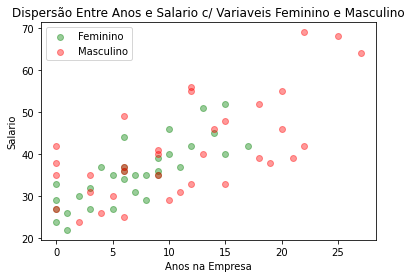

In [8]:
#Definindo Scatter + Cor + Transparência
plt.scatter(dados_fem["Anos"],dados_fem["Salario"],c="green", alpha=0.4,label="Feminino")
plt.scatter(dados_mas["Anos"],dados_mas["Salario"],c="red",alpha=0.4,label="Masculino")
plt.title ("Dispersão Entre Anos e Salario c/ Variaveis Feminino e Masculino")
plt.xlabel("Anos na Empresa")
plt.ylabel("Salario")
plt.legend()
plt.show()


<div id="ex8"></div>

### EXERCÍCIO 8:

Como as informações do gráfico acima se relacionam às suas hipóteses no [exercício 2](#ex2)? Você mudaria a sua opinião quanto à suspeita de discriminação salarial? Explique.

<div id="ex9"></div>

### EXERCÍCIO 9 [EXTRA]:

Vamos analisar os dados divididos por faixas de anos na empresa. Crie uma nova coluna `'Faixa'` em `dados` contendo as faixas de anos na empresa. Divida a variável `Anos` em tantas faixas necessárias necessárias para iniciar em 0 (inclusive) e terminar em 30 (exclusive) com amplitude das faixas de 3 anos. *Dica: use a função `pd.cut` e altere alguns argumentos dessa função*.


In [10]:
# Escreva seu código aqui

AttributeError: 'DataFrame' object has no attribute 'pd'

<div id="ex10"></div>

### EXERCÍCIO 10 &#x2605;&#x2605;&#x2605; [EXTRA]:

Imprima as mesmas estatísticas do [exercício 1](#ex1) (salários de todas as pessoas da base de dados, salários das mulheres e salários dos homens), mas agora agrupando por `Faixa`. *Dica: use a função `.groupby` de um `DataFrame`.*

In [ ]:
# Escreva seu código aqui


<div id="ex11"></div>

### EXERCÍCIO 11 [EXTRA]:

O resultado acima dá indícios para confirmar ou rejeitar a sua hipótese do [exercício 8](#ex8)?